# Исследовательский анализ данных рынка недвижимости

## 1. Описание проекта:

- В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

- Определим рыночную стоимость объектов недвижимости. Наша задача — установить параметры, которые позволят построить автоматизированную систему, для отслеживания аномалий и мошеннической деятельности.

- По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## 2. Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении
    
Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data)
data.info() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## 3. Предобработка данных

### Работа с пропусками

In [3]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


<div class="alert alert-info">

- высоту потолков, жилую площадь и площадь кухни заполняем медианным значением, т.к. этот параметр имеет типовое значение у большинства объектов в рамках стандартов проектирования жилья многоэтажных домов
- 86 строк где не указано количество этажей заполним значением 1, вероятнее всего это одноэтажные дома в частном секторе
- отсутствие значения в столбце с количеством балконов сочтем за отсутсвтие последних и заполним нулевым значением
</div>

In [4]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
data['floors_total'] = data['floors_total'].fillna(1) 
data['living_area'] = data['living_area'].fillna(data['living_area'].median()) 
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median()) 
data['balcony'] = data['balcony'].fillna(0) 

print(data.isna().sum())



total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [5]:
print('Срез с пропусками в названии населенного пункта')
check_local = data.loc[data['locality_name'].isna()]
display(check_local.head(10))


Срез с пропусками в названии населенного пункта


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.65,4.0,42.60,2,NaN,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.65,24.0,15.60,3,NaN,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.65,24.0,33.10,21,NaN,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.65,5.0,30.80,5,NaN,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,2.65,7.0,30.00,6,NaN,False,False,9.10,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,2.65,7.0,59.10,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,2.65,24.0,20.00,23,NaN,False,False,9.10,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


<div class="alert alert-info">

Пропусков в столбце 'locality_name' крайне мало, на исследования они не повлияют, оставим их
</div>

In [6]:
print('Срез с пропусками в столбцах с расстоянием до аэропорта')
check_airport = data.loc[data['airports_nearest'].isna()]
display(check_airport.head(10)) 

Срез с пропусками в столбцах с расстоянием до аэропорта


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,30.00,2,NaN,False,False,9.10,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,30.00,1,NaN,False,False,9.10,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.30,9,NaN,False,False,11.60,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,2.65,4.0,42.50,3,NaN,False,False,5.70,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,2.65,12.0,30.00,8,NaN,False,False,9.10,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.80,5,NaN,False,False,11.90,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


<div class="alert alert-info">

схожее количество пропусков в столбцах:
    - 'airports_nearest', 
    - 'cityCenters_nearest', 
    - 'parks_around3000', 
    - 'parks_nearest',
    - 'ponds_around3000', 
    - 'ponds_nearest' 
не случайно, значит объекты недвижимости находятся вдали от аэропортов, центров и водоемов, также оставим их.
</div>

In [7]:
print('Срез с пропусками в сроке со дня публикации')
check_exposition = data.loc[data['days_exposition'].isna()]
display(check_exposition.head(10)) 
print('Соотношение пропусков в day_exposition:', len(check_exposition) / len(data))

Срез с пропусками в сроке со дня публикации


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,30.00,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,30.00,3,NaN,False,False,9.1,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.30,7,NaN,False,False,7.0,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.70,9,NaN,False,False,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
49,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9.0,18.00,7,NaN,False,False,6.0,0.0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2.0,94.00,2,NaN,False,False,11.0,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
71,20,4850000.0,57.5,2019-03-27T00:00:00,3,2.50,9.0,39.00,8,NaN,False,False,6.2,0.0,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.65,10.0,30.00,6,NaN,False,False,9.1,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,11,2400000.0,43.9,2019-03-13T00:00:00,2,2.65,2.0,27.46,1,NaN,False,False,5.2,0.0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Соотношение пропусков в day_exposition: 0.13422507278788134


<div class="alert alert-info">

Большинство данных в этих строках присутствуют. Вероятнее всего пропуски здесь обусловлены тем, что эти объявления еще не сняты с публикации на дату выгрузки данных. Их количество чуть более 3 тысяч (чуть более 13%)
</div>

In [8]:
data.columns #проверяем корректность и стилистику названий столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
print(data.duplicated().sum())

0


### Преобразуем типы данных в столбцах

In [10]:
data['last_price'] = data['last_price'].astype(int) # преобразуем данные по последней цене в целочисленный тип
data['total_area'] = data['total_area'].astype(int) # преобразуем данные по общей площади в целочисленный тип
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition']) # преобразуем данные по дате публикации в тип date
data['floors_total'] = data['floors_total'].astype(int) # преобразуем данные по количеству этажей в целочисленный тип
data['living_area'] = data['living_area'].astype(int) # преобразуем данные по жилой площади в целочисленный тип
data['kitchen_area'] = data['kitchen_area'].astype(int) # преобразуем данные по площади кухни в целочисленный тип
data['balcony'] = data['balcony'].astype(int) # преобразуем данные по количеству балконов в целочисленный тип
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,False,False,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,NaN,False,False,11,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,NaN,False,False,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159,2015-07-24,3,2.65,14,30,9,NaN,False,False,9,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,False,False,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30,2018-09-10,1,2.65,12,14,5,NaN,False,False,9,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37,2017-11-02,1,2.65,26,10,6,NaN,False,False,14,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71,2019-04-18,2,2.65,24,30,22,NaN,False,False,18,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33,2018-05-23,1,2.65,27,15,26,NaN,False,False,8,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,NaN,False,False,6,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-info">

- В данных мало пропусков, а те что есть в основном можно обосновать, критической нехватки данных для исследования не наблюдается
- также не наблюдается ошибок, которые могли возникнуть при формировании и импорте датасета
- все необходимые преобразования типов данных для вычислений и визуализации проведены

</div>

### Добавляем новые столбцы, на основе данных из исходных столбцов

<div class="alert alert-info">

- добавим цену квадратного метра
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.
</div>

In [11]:
data['price_m2'] = (data['last_price'] / data['total_area']).astype(int)
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

def floors_category(row): # категоризируем этажи
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['floors_category'] = data.apply(floors_category, axis=1)

data['living_area_ratio'] = (data['living_area'] / data['total_area']).round(2)
data['kitchen_area_ratio'] = (data['kitchen_area'] / data['total_area']).round(2)

display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday_exposition,month_exposition,year_exposition,floors_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,False,False,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,NaN,False,False,11,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,83750,1,12,2018,первый,0.45,0.28
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,NaN,False,False,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,0.61,0.14
3,0,64900000,159,2015-07-24,3,2.65,14,30,9,NaN,False,False,9,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,0.19,0.06
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,False,False,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,0.32,0.41
5,10,2890000,30,2018-09-10,1,2.65,12,14,5,NaN,False,False,9,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,96333,0,9,2018,другой,0.47,0.30
6,6,3700000,37,2017-11-02,1,2.65,26,10,6,NaN,False,False,14,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,100000,3,11,2017,другой,0.27,0.38
7,5,7915000,71,2019-04-18,2,2.65,24,30,22,NaN,False,False,18,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,111478,3,4,2019,другой,0.42,0.25
8,20,2900000,33,2018-05-23,1,2.65,27,15,26,NaN,False,False,8,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87878,2,5,2018,другой,0.45,0.24
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,NaN,False,False,6,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524,6,2,2017,другой,0.70,0.10


### Изучим самые значимые данные, используя гистораммы. Посмотрим разброс значений.

#### Распределение по общей площади

Распределение по общей площади
count    23699.000000
mean        33.873497
std         21.159664
min          2.000000
25%         19.000000
50%         30.000000
75%         41.000000
max        409.000000
Name: living_area, dtype: float64


<AxesSubplot:>

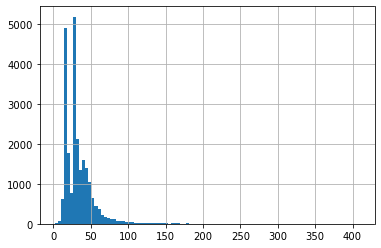

In [12]:
print('Распределение по общей площади')
print(data['living_area'].describe())

data['living_area'].hist(bins=100)

Присутствуют выбросы в минимальных значениях. Посчитаем долю от общей выборки.

In [13]:
print(data.loc[data['living_area'] <= 9]['living_area'].count() / data['living_area'].count())

0.0010548968310899194


<div class="alert alert-info">
    
Доля менее 1%, не повлияет на исследование. Можем отфильтровать.

Возможные причины таких аномалий:
   - продажи долей квартиры наследниками
   - ошибки при заполнении пользователями
   - 
</div>    

<AxesSubplot:>

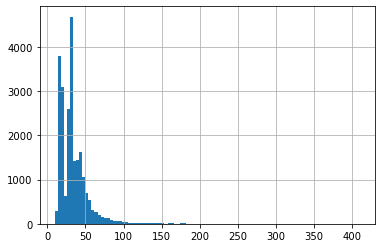

In [14]:
data = data[data['living_area'] > 9]
data['living_area'].hist(bins=100)

#### Распределение по цене

Распределение по цене
count    2.367400e+04
mean     6.540889e+06
std      1.088587e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


<AxesSubplot:>

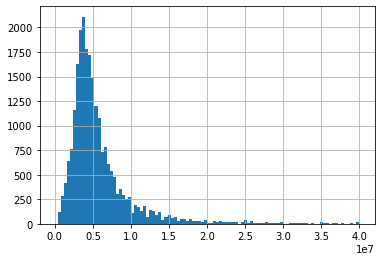

In [15]:
print('Распределение по цене')
print(data['last_price'].describe())

data['last_price'].hist(bins=100, range=(12000, 40000000))

Присутствуют выбросы, как в минимальных, так и в максимальных значениях. Посчитаем их долю.

In [16]:
print(data.loc[data['last_price'] <= 800000]['last_price'].count() / data['last_price'].count())
print(data.loc[data['last_price'] >= 40000000]['last_price'].count() / data['last_price'].count())

0.005237813635211625
0.008152403480611642


<div class="alert alert-info">
    
Доля чуть менее 1%, не повлияет на исследование. Можем отфильтровать.

Возможные причины таких аномалий:
  - цены сильно занижены или завышены
  - присутствуют цены на доли объектов недвижимости, 
  - коммерческую недвижимость с большой площадью, 
  - жилье премиум-класса с большой площадью, в т.ч. с прилегающими участками
</div> 

count    2.335700e+04
mean     5.924168e+06
std      4.549099e+06
min      8.200000e+05
25%      3.450000e+06
50%      4.610000e+06
75%      6.700000e+06
max      3.999000e+07
Name: last_price, dtype: float64


<AxesSubplot:>

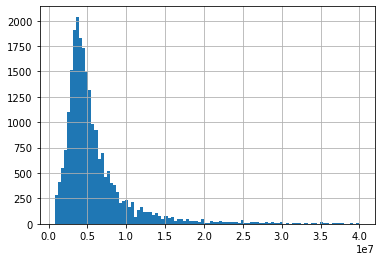

In [17]:
data = data[(data['last_price'] > 800000) & (data['last_price'] < 40000000)]
print(data['last_price'].describe())
data['last_price'].hist(bins=100)

#### Распределение по числу комнат

Распределение по числу комнат
count    23357.000000
mean         2.054759
std          1.049286
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


<AxesSubplot:>

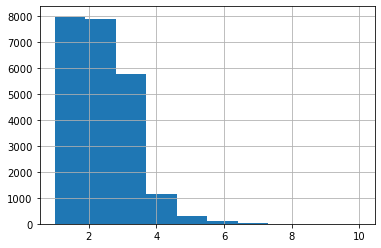

In [18]:
print('Распределение по числу комнат')
print(data['rooms'].describe())

data['rooms'].hist(bins=10, range=(1, 10))

Присутствуют выбросы, как в минимальных, так и в максимальных значениях. Посчитаем их долю.

In [19]:
print(data.loc[data['rooms'] < 1]['rooms'].count() / data['rooms'].count())
print(data.loc[data['rooms'] > 10]['rooms'].count() / data['rooms'].count())

0.008305861197927816
0.000256882305090551


<div class="alert alert-info">
    
Доля чуть менее 1%, не повлияет на исследование. Можем отфильтровать.

Возможные причины таких аномалий:
  - присутствуют цены на доли объектов недвижимости,
  - коммерческая недвижимость с большой площадью,
  - жилье премиум-класса с большой площадью
</div> 

<AxesSubplot:>

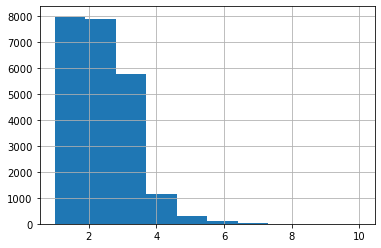

In [20]:
data = data[(data['rooms'] >= 1) & (data['rooms'] <= 10)]
data['rooms'].hist(bins=10)

#### Распределение по высоте потолков

Распределение по высоте потолков
count    23157.000000
mean         2.720125
std          0.984156
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

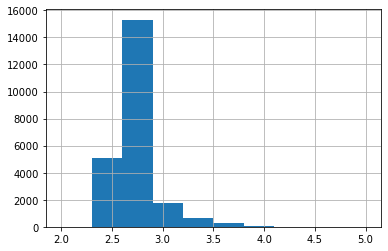

In [21]:
print('Распределение по высоте потолков')
print(data['ceiling_height'].describe())

data['ceiling_height'].hist(bins=10, range=(2, 5))

Присутствуют выбросы, как в минимальных, так и в максимальных значениях. Посчитаем их долю.

In [22]:
print(data.loc[data['ceiling_height'] < 2]['ceiling_height'].count() / data['ceiling_height'].count())
print(data.loc[data['ceiling_height'] > 5]['ceiling_height'].count() / data['ceiling_height'].count())

0.00012955045990413266
0.0012955045990413266


<div class="alert alert-info">
    
Доля менее 1%, не повлияет на исследование. Можем отфильтровать.

Возможные причины таких аномалий:
  - коммерческая недвижимость с высокими потолками
  - дизайнерская загородная недвижимость
  - сельские объекты с низкими потолками
  - прочие нестандартные объекты
</div>

<AxesSubplot:>

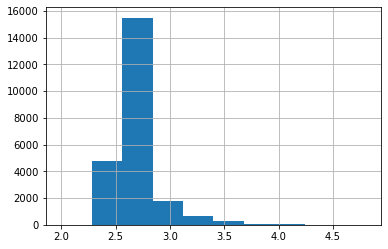

In [23]:
data = data[(data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 5)]
data['ceiling_height'].hist(bins=10)

### Изучим данные о сроках продажи объектов недвижимости

Распределение по длительности сроков продажи
count    20031.000000
mean       180.542409
std        219.294392
min          1.000000
25%         45.000000
50%         96.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


<AxesSubplot:>

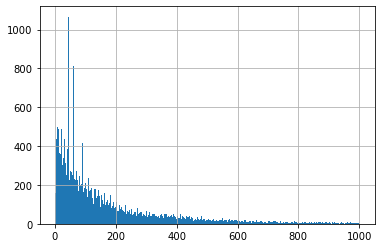

In [24]:
print('Распределение по длительности сроков продажи')
print(data['days_exposition'].describe())

data['days_exposition'].hist(bins=300, range=(0, 1000))

Медиана и 1,2 квартили говорят о том, что нормальное распределение по срокам продажи недвижимости от 3 до 8 месяцев. По гистограмме видны выбросы в виде слишком быстрой (от 1 дня) и слишком долгой продажи (более 4 лет). 

Посчитаем долю сверхбыстрых и сверхдолгих продаж. 

In [25]:
print(data.loc[data['days_exposition'] <= 10]['days_exposition'].count() / data['days_exposition'].count())
print(data.loc[data['days_exposition'] >= 790]['days_exposition'].count() / data['days_exposition'].count())

0.060955518945634266
0.02970395886376117


<div class="alert alert-info">
    
Их доля чуть более 8% от общей выборки 

Возможные причины таких аномалий: 
- для сверхбыстрых (менее 10 дней)
    - цена намного ниже рыночной 
    - передумали продавать 
    - определено как подозрительное платформой и заблокировано
    - заблокировано и снято по жалобе от пользователей
    - продали через другую платформу, на которой разместили намного раньше
    - часть публикаций риэлторов
- для сверхдолгих (более 2 лет)
    - цена намного выше рыночной
    - заброшенное объявление, забыли снять с публикации
    - крайне непривлекательное расположение (в глуши, загрязненные районы, закрытые территориальные объединения(ЗАТО) и т.п.)
    - мониторинг спроса без цели реализации продажи
    - крайне непривлекательное состояние (санитарные, отсутствие ремонта, арендная квартира)
</div>

### Изучим какие факторы больше всего влияют на стоимость квартиры

Коэффициент корреляции Пирсона: 0.7852874231927516
Средняя стоимость квадратного метра жилья - 97871.21613907628


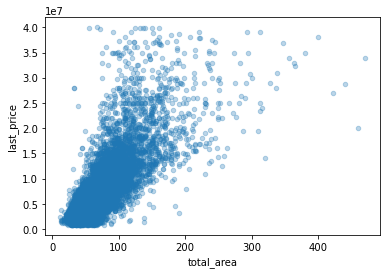

In [26]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
print('Коэффициент корреляции Пирсона:', data['total_area'].corr(data['last_price']))
print('Средняя стоимость квадратного метра жилья -', data['price_m2'].mean())

Коэффициент корреляции говорит о довольно тесной линейной зависимости цены от общей площади. 
Основная масса объектов находится в диапазоне до 150 кв.м. и до 20 млн руб.
Точечно присутствуют объекты с относительно малой площадью и ценой, близкой к максимальной в выборке.

Коэффициент корреляции Пирсона: 0.5148872432058256


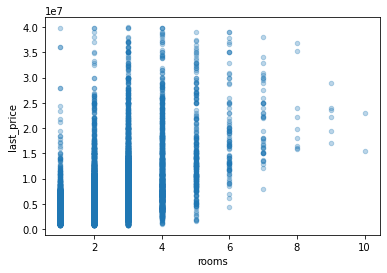

In [27]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3)
print('Коэффициент корреляции Пирсона:', data['rooms'].corr(data['last_price']))

Коэффициент корреляции говорит о неявной линейной зависимости цены от числа комнат. 
Основная масса объектов находится в диапазоне до 6 комнат и до 35 млн руб.
Точечно присутствуют объекты с относительно малым числом комнат и ценой, близкой к максимальной в выборке.

Коэффициент корреляции Пирсона: -0.3389666654596722


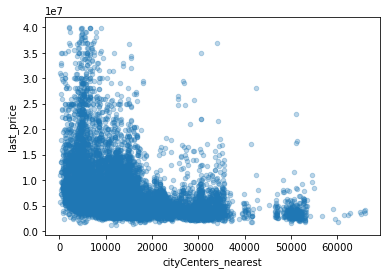

In [28]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)
print('Коэффициент корреляции Пирсона:', data['cityCenters_nearest'].corr(data['last_price']))

Коэффициент корреляции говорит о склонности к обратной линейной зависимости цены от удаленности от центра города, однако мы наблюдаем зависимость, чем ближе к центру, тем дороже объект недвижимости. Это также говорит о более сложной зависимости ценообразования.
Основная масса объектов находится в диапазоне до 40 км и до 25 млн руб.
Точечно присутствуют объекты с относительно большой удаленностью от центра и ценой, близкой к максимальной в выборке.

<AxesSubplot:xlabel='floors_category', ylabel='last_price'>

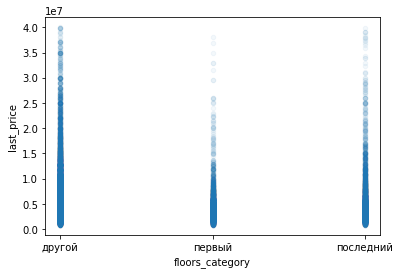

In [29]:
data.plot(x='floors_category', y='last_price', kind='scatter', alpha=0.05)

- расположение объекта на первом этаже явно влияет на ценообразование, т.е. снижает ее.
- плотность столбца с данным в категории "другой" явно говорит о том, что объекты не на первом и последнем этаже, чаще дороже.
- в столбце категории "последний" дорогих объектов большем чем в "первый" скорее из-за новостроек в современных жилых комплексов, и пригородной недвижимости премиум-класса с несколькими этажами(таунхаусы).

Медианная цена в 2014 г. - 7488280.0
Медианная цена в 2019 г. - 5100000.0
1.4682901960784314


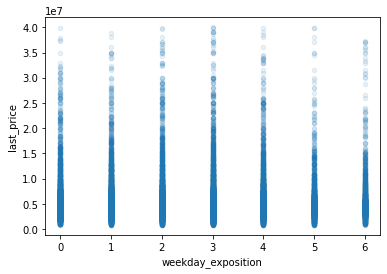

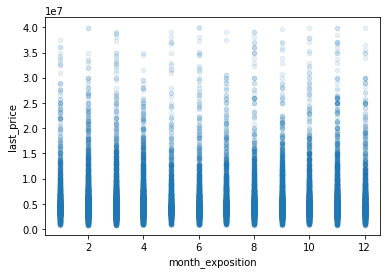

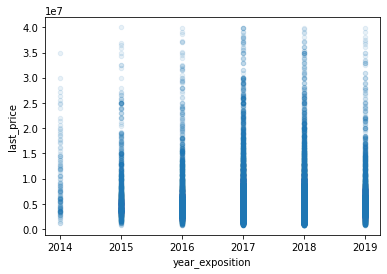

In [30]:
data.plot(x='weekday_exposition', y='last_price', kind='scatter', alpha=0.1)
data.plot(x='month_exposition', y='last_price', kind='scatter', alpha=0.1)
data.plot(x='year_exposition', y='last_price', kind='scatter', alpha=0.1)
median_price2014 = data[data['year_exposition'] == 2014]
median_price2019 = data[data['year_exposition'] == 2019]
print('Медианная цена в 2014 г. -', median_price2014['last_price'].median())
print('Медианная цена в 2019 г. -', median_price2019['last_price'].median())
print(median_price2014['last_price'].median() / median_price2019['last_price'].median())


<div class="alert alert-info">
    
По дням недели:
- прослеживается разница в количестве размещений дорогих объектов, вероятно большинством дорогостоящих объектов занимаются риэлторы, которые размещают объявления в будни. Наибольшее количество публикаций происходит в середине недели.

По месяцам:
- в январе и мае плотность размещения наименьшая, ввиду трети месяца новогодних каникул\майских праздников и общего спада активности на рынке
- одна из наибольших плотностей в ноябре возможна из-за предверия нового года, многие решают завершить\реализовать сделки до конца года
- также прослеживается снижение плотности размещения в летние месяцы, сезон отпусков, общая активность на рынке также снижается.

По годам:
- явно прослеживается резкий рост объемов продаж и средней цены на недвижимость с 2014 до 2017 года, далее пошла небольшая корректировка на снижение. Тенденция спада в 2014 г. и дальнейший рост, связаны с кризисом 2014 года (резкое ослабление рубля к мировым валютам, экономические санкции многих стран к России после присоединения Крыма, и как следствие значительный рост инфляции в российской экономике).
</div>

### Анализ десяти населённых пунктов с наибольшим числом объявлений

In [31]:
data['locality_name'].value_counts().head(10).index

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')

<AxesSubplot:>

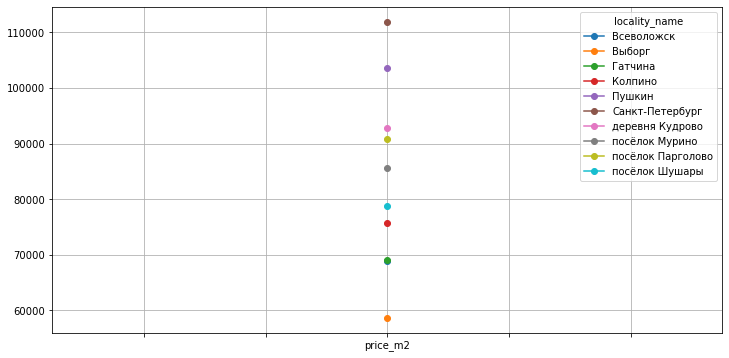

In [32]:
df_top10 = data[data['locality_name'].isin(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг'])]
df_top10.pivot_table(columns='locality_name', values='price_m2').plot(style='-o', grid=True, figsize=(12, 6))

Из 10 населенных пунктов в Санкт-Петербурге, как и ожидалось самая высокая средняя цена за кв.м. жилья, далее идет г.Пушкин. 
- с первым все ясно, областной центр, а также город федерального значения
- второй является наиболее развитым пригородом первого
- средняя цена за кв.м. выше 100 000 руб.

Наиболее дешевые объекты из выборки в Выборге и Гатчине
- оба административных центра относительно далеко от областного центра
- средняя цена за кв.м. ниже 70 000 руб.

### Определим центральную зону Спб и изучим предложения в ней

Средняя стоимость квадратного метра жилья в городе - 111938.43399908919


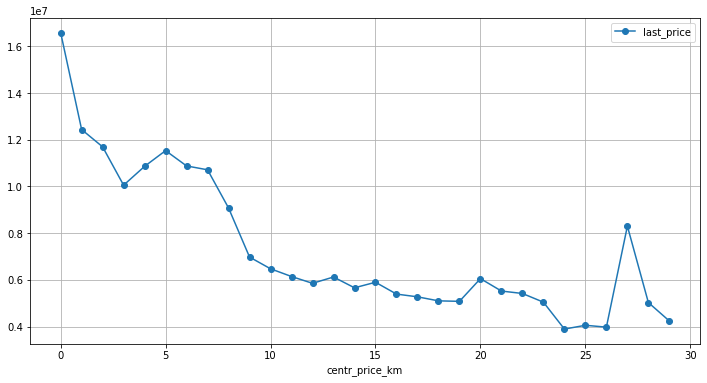

In [33]:
data['centr_price_km'] = (data['cityCenters_nearest'] / 1000).round()
df_spb = data[data['locality_name'].isin(['Санкт-Петербург'])]
df_spb.pivot_table(index='centr_price_km', values='last_price', aggfunc='mean').plot(style='-o', grid=True, figsize=(12, 6))
print('Средняя стоимость квадратного метра жилья в городе -', df_spb['price_m2'].mean())

График средней цены километра удаленности от центра Санкт-Петербурга, после 9 км наблюдается резкий спад и относительная стабилизация цены. Поэтому условно центральную зону можно определить с радиусом 9 км.

Наблюдается заметный скачок цены на 27 км, возможно это зона г. Пушкин.

### Определим зависимость цены от основных параметров в центральной зоне Спб и сравним с выводами по всей базе

In [34]:
df_spb_center = df_spb[df_spb['centr_price_km'] < 9] # выделим центральную зону Спб

Коэффициент корреляции: 0.47512883153615154


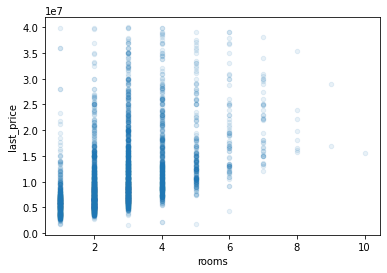

In [35]:
df_spb_center.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1)
print('Коэффициент корреляции:', df_spb_center['rooms'].corr(df_spb_center['last_price']))

<div class="alert alert-info">
Коэффициент корреляции и диаграмма показывают явный рост стоимости с увеличением числа комнат. 
Распределение практически идентично распределению по всей базе.
</div>

Коэффициент корреляции: 0.15281293083218953


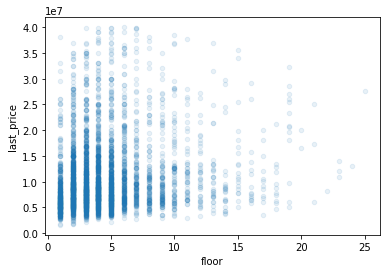

In [36]:
df_spb_center.plot(x='floor', y='last_price', kind='scatter', alpha=0.1)
print('Коэффициент корреляции:', df_spb_center['floor'].corr(df_spb_center['last_price']))

<div class="alert alert-info">
Коэффициент корреляции указывает на слабую зависимость от этажа на стоимость. По диаграмме также прослеживается:
- меньшее количество дорогих объектов на первом этаже
- основная масса объектов находится с 1 по 10 этажи
- объекты на верхних этажах высоток с относительно невысокой стоимостью вероятно жилые комплексы, удаленные от центра
- выводы сходны с общими по базе.
</div>

Коэффициент корреляции: -0.09658378489228112


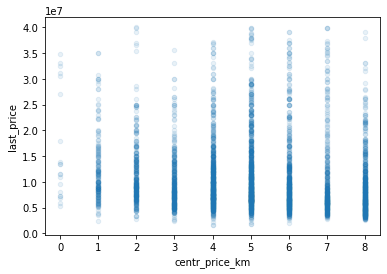

In [37]:
df_spb_center.plot(x='centr_price_km', y='last_price', kind='scatter', alpha=0.1)
print('Коэффициент корреляции:', df_spb_center['centr_price_km'].corr(df_spb_center['last_price']))

<div class="alert alert-info">
    Распределение в диграмме похоже на распределение по всему Спб
    </div>

<AxesSubplot:xlabel='year_exposition', ylabel='last_price'>

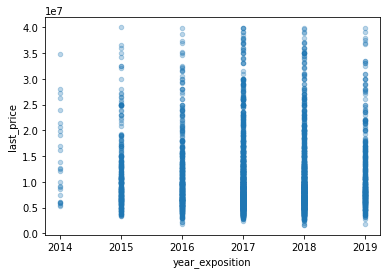

In [38]:
df_spb_center.plot(x='year_exposition', y='last_price', kind='scatter', alpha=0.3)

<div class="alert alert-info">
    Рост стоимости по годам также прослеживается. Диаграмма сходна с общей по всей базе.
    </div>

<div class="alert alert-info">
    
Общие выводы по центральной зоне Спб:    
- график распределения по общей площади: основная масса объектов с относительно небольшой площадью, объектов с большой площадью мало, что ожидаемо для центра города.
- график распределения по цене: присутствуют довольно много объектов с ценой, близкой к максимальной, несмотря на относительно небольшую площадь, что нормально для объектов в центре. Чуть больше объектов в зоне 5-7 км от центра, вероятно в ней центр кольца жилых комплексов.
- график распределения по числу комнат: основная масса объектов имеет от 1 до 6 комнат, что нормально для многоквартирных домов в городской черте, наблюдается небольшой выброс на расстоянии 5 км, о нем мы упоминали выше.
- график распределения по высоте потолков: объекты в основном с высотой потолков от 2.5 до 3.5 метров.
    
</div>

## Общие выводы:

#### - Средняя стоимость квадратного метра жилья в регионе около 98 000 руб., а в Санкт-Петербурге примерно 112 000 руб.
#### - разница в цене минимальной и максимальной примерно в 40 раз, если не учитывать точечные выбросы. Это вполне объяснимо потому, что Санкт-Петербург является городом федерального значения, одним из крупнейших транспортных, деловых и экономических центров в стране.
#### - населенные пункты с самыми высокими ценами (из топ-10): Спб, г.Пушкин очевидно из-за наиболее развитой инфраструктуры, уровню населения и областного значения. 
#### - населенные пункты с самыми низкими ценами (из топ-10): г.Выборг и Гатчина вероятнее из-за удаленности от федеральных трасс, не очень развитой инфраструктуры и низкой долей ВВП на регион.
#### - медианные значения цен 2014 и 2019 годов - 7.5 и 5.1 млн руб., т.е. снизилась почти в полтора раза. Вероятно после восстановления отрасли и экономики от кризиса.
#### - объем рынка был очень низким в регионе после начала кризиса в 2014 году, затем к 2017 году восстановился.
#### - у объектов на средних этажах доля дорогих больше, чем у остальных. Наибольшая доля объектов с низкими ценами на первых этажах. Подобная закономерность наблюдается на всем рынке недвижимости.